### Introduction to Plotting in Python

#### Goals of this excercise:
1. Load in data from your computer
2. Perform basic exploratory data analysis
3. Create basic plots

In [1]:
## Importing necessary libraries
import numpy as np #Allows us to perform mathematical operations
import matplotlib.pyplot as plt #Allows us to make figures and plots
import pandas as pd #Allows us to load in .csv files and manipulate them easily

##### Loading in data

In [2]:
'''
In order to load data into your computer, you need to find the "path" of the data on your computer.
To get the path of a file automatically, find the file on your computer, right click and copy as pathname 
(or copy as path on windows). Paste the result in the pd.read_csv function and set a variable equal to this
function. Once you display(data), you will see what the data looks like. Open the dat ain excel to verify that
they are the same.

You defined the library Pandas as 'pd' in the first cell. You can define libraries as anything you want
pd is now the library and read_csv is an 'attribute' or function available in this library.
By writing pd.read_csv, python knows to look in pandas for the function read_csv, which returns a
'dataFrame', which is basically python's version of an excel spreadsheet.
'''

data = pd.read_csv(r"../Python_Workshops/iris.csv")
display(data)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


##### Exploratory Data Analysis

In [3]:
'''
Now, let's explore this data. Pandas dataframes have some neat tricks.

After you go through the written code, try to answer the following questions about the data using Python:
1. How many total flowers were sampled?
2. How many of each variety is there?
3. What are the average, median and standard deviation of each flower trait?
4. Which flower(s) has the maximum sepal/petal, length/width? Are these outliers?

Note: These questions are supposed to be difficult, and you should try to look up answers online!
'''

#You can get all data in a single column based on the name (use a string!) by using []
sepalLength = data['sepal.length']
#You can get multiple rows worth of data by using [] and a list of row numbers
someFlowerData = data.iloc[[1,3,5]]
#You can get a single value by using two sets of []
petalLengthFlower10 = data['petal.length'][10]
print (sepalLength)
print (someFlowerData)
print ("This is the petal length of flower 10:",petalLengthFlower10)
print ("The average sepal length is:",np.average(sepalLength))

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64
   sepal.length  sepal.width  petal.length  petal.width variety
1           4.9          3.0           1.4          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
This is the petal length of flower 10: 1.5
The average sepal length is: 5.843333333333334


##### Plotting Data

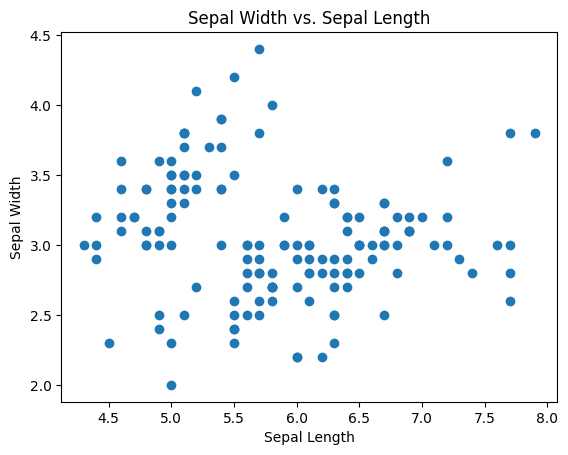

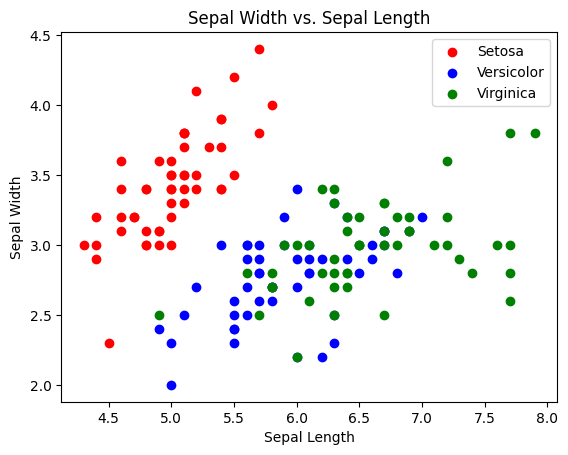

In [4]:
'''
Now, let's make some plots!

Same thing, go through the code and try to answer the questions:
1. Which two variables create the most spread between flower types?
2. What do the averages and standard deviations look like when plotted in 2D?
'''

#Using plt.scatter, it is very simple to plot a lot of points...
xData = data['sepal.length']
yData = data['sepal.width']
plt.scatter(xData,yData)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs. Sepal Length')
plt.show()
#But how are the types of flowers distributed when looking at these traits? Let's color the points.
#Setting up a new figure
fig = plt.figure()
flowerTypes = np.unique(data['variety'])
colors = ['red','blue','green']
for flowerType,color in zip(flowerTypes,colors):
    xData = data['sepal.length'][data['variety']==flowerType]
    yData = data['sepal.width'][data['variety']==flowerType]
    plt.scatter(xData,yData,color=color,label=flowerType)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Width vs. Sepal Length')
plt.legend()
#Looks great!

### Answers (Exploratory Data Analysis)

In [5]:
#1. How many total flowers were sampled?
print (f'Answer 1:\nThere are {len(data.index)} total flowers\n')

#2. How many of each variety is there?
print ('Answer 2:')
for var in np.unique(data['variety']):
    count = 0
    for flower in data['variety']:
        if flower == var:
            count = count + 1
        else:
            pass
    print (f'{count} flowers of the {var} variety!')
print ('\n')

#3. What are the average,standard deviation and mean of each flower trait?
print ('Answer 3:')
for trait in data.columns:
    if data[trait].dtype == float:
        avg = np.average(data[trait])
        med = np.median(data[trait])
        std = np.std(data[trait])
        trait_string = trait.replace('.',' ').title()
        print (f'The average {trait_string} is {avg:.2f} \u00B1 {std:.2f}')
        print (f'The median {trait_string} is {med:.2f}\n')

#4. Which flower(s) has the maximum sepal/petal, length/width? Are these outliers?
print ('Answer 4:')
for trait in data.columns:
    trait_string = trait.replace('.',' ').title()
    if data[trait].dtype == float:
        maxIndices = data.index[data[trait]==data[trait].max()]
        minIndices = data.index[data[trait]==data[trait].min()]
    for i,j in zip(maxIndices,minIndices):
        print (f'Flower {i} has the maximum {trait_string} and flower {j} has the minimum {trait_string}')

Answer 1:
There are 150 total flowers

Answer 2:
50 flowers of the Setosa variety!
50 flowers of the Versicolor variety!
50 flowers of the Virginica variety!


Answer 3:
The average Sepal Length is 5.84 ± 0.83
The median Sepal Length is 5.80

The average Sepal Width is 3.06 ± 0.43
The median Sepal Width is 3.00

The average Petal Length is 3.76 ± 1.76
The median Petal Length is 4.35

The average Petal Width is 1.20 ± 0.76
The median Petal Width is 1.30

Answer 4:
Flower 131 has the maximum Sepal Length and flower 13 has the minimum Sepal Length
Flower 15 has the maximum Sepal Width and flower 60 has the minimum Sepal Width
Flower 118 has the maximum Petal Length and flower 22 has the minimum Petal Length
Flower 100 has the maximum Petal Width and flower 9 has the minimum Petal Width
Flower 109 has the maximum Petal Width and flower 12 has the minimum Petal Width
Flower 144 has the maximum Petal Width and flower 13 has the minimum Petal Width
Flower 100 has the maximum Variety and flowe

### Answers (Plotting Data)

sepal.width,sepal.length
petal.length,sepal.length
petal.width,sepal.length
sepal.length,sepal.width
petal.length,sepal.width
petal.width,sepal.width
sepal.length,petal.length
sepal.width,petal.length
petal.width,petal.length
sepal.length,petal.width
sepal.width,petal.width
petal.length,petal.width


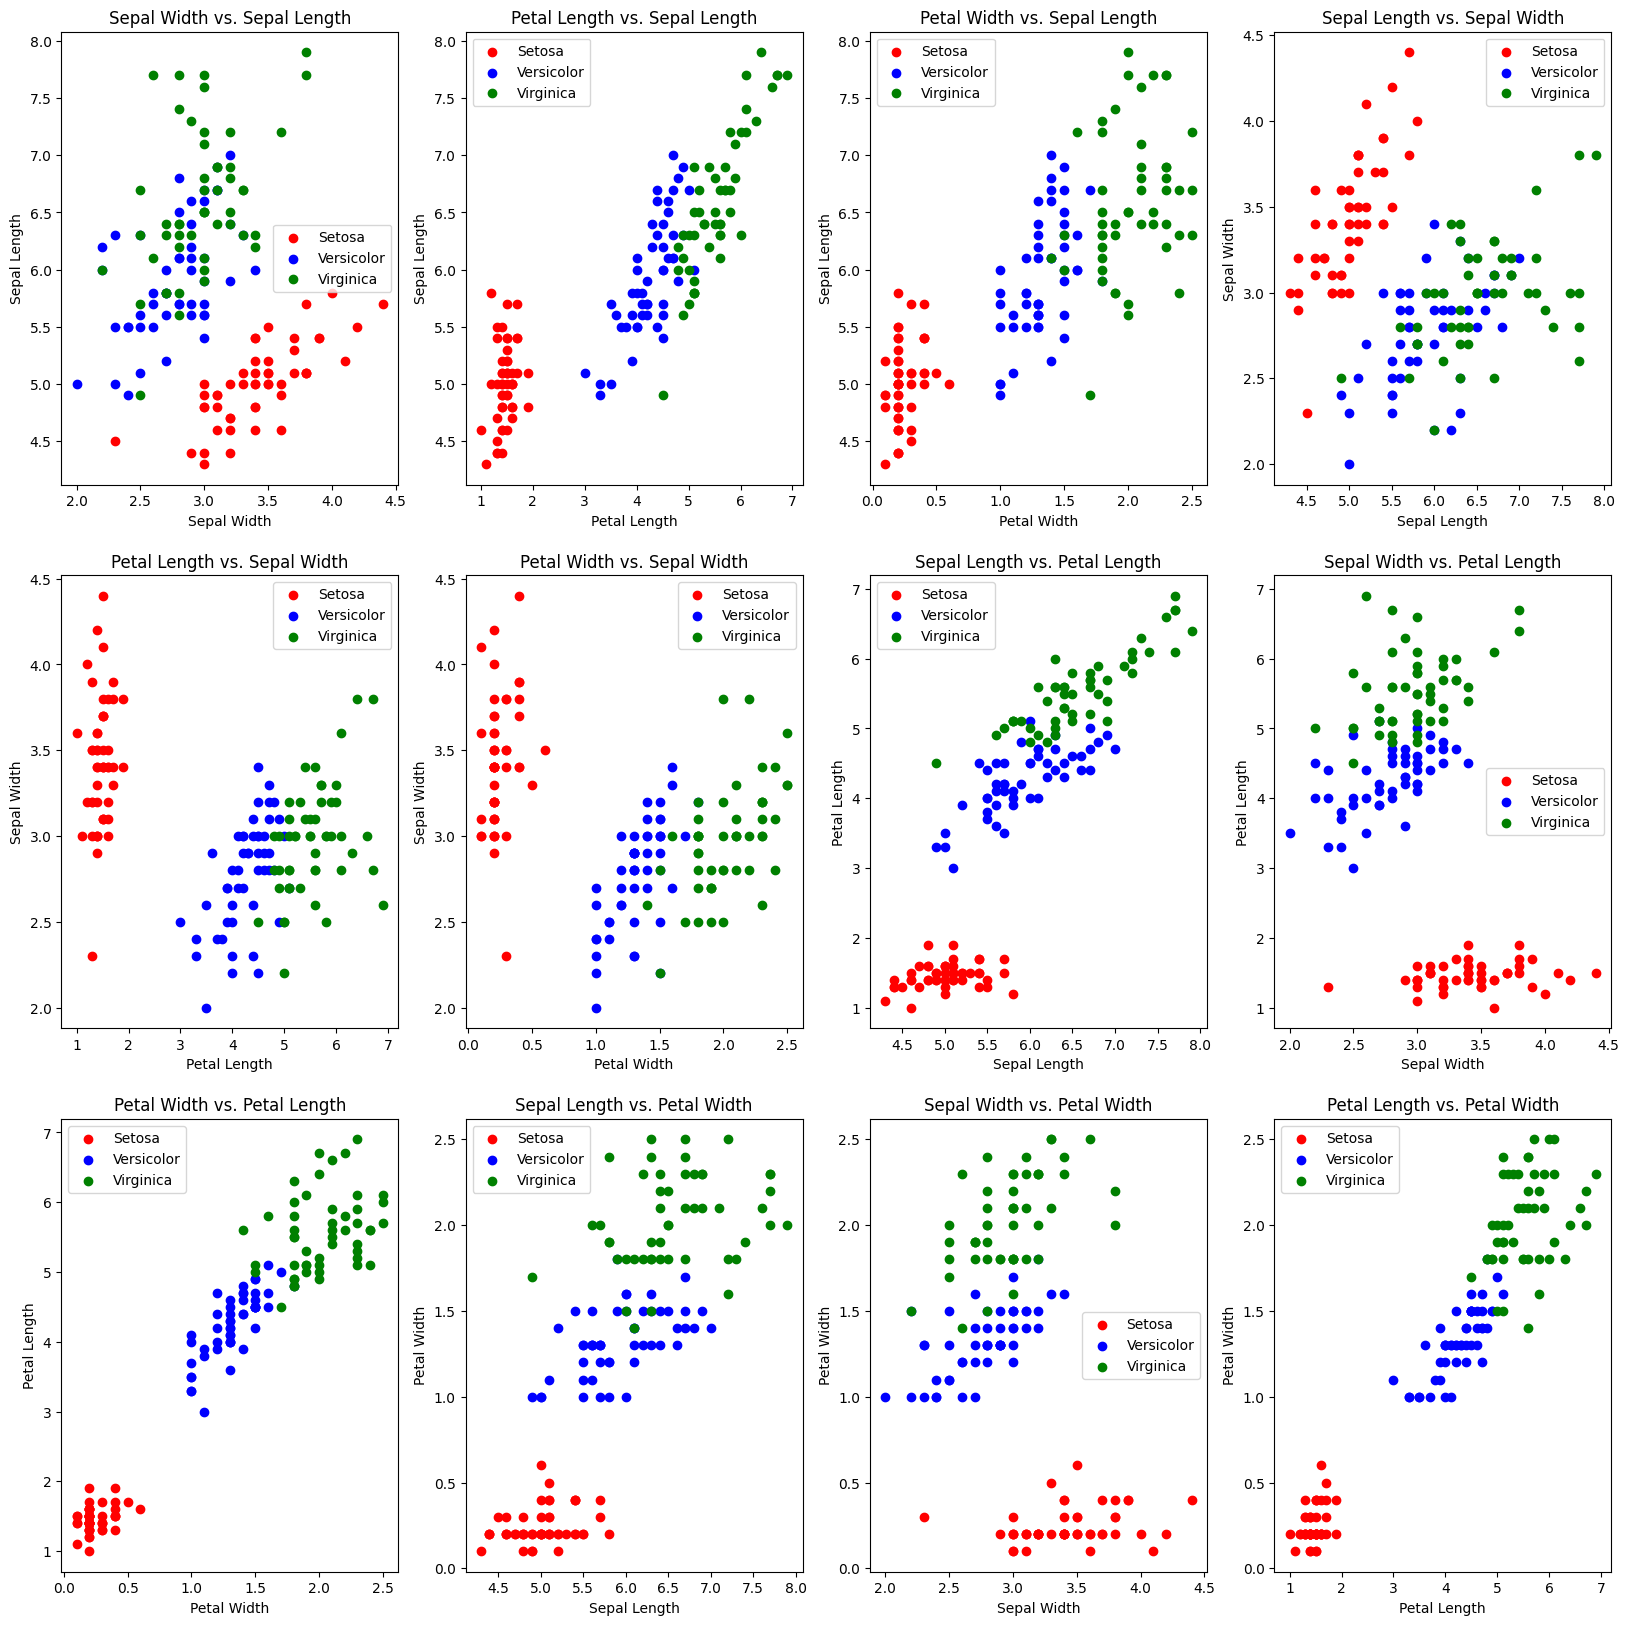

In [22]:
array1 = np.array(data.columns)
array2 = np.array(data.columns)
xMesh,yMesh = np.meshgrid(array1,array2)

fig = plt.figure(figsize=(20,20))
n = 1
for trait1,trait2 in zip(xMesh.flatten(),yMesh.flatten()):
    if trait1!=trait2 and trait1!='variety' and trait2!='variety':
        ax = fig.add_subplot(4,3,n)
        print (f'{trait1},{trait2}')
        flowerTypes = np.unique(data['variety'])
        colors = ['red','blue','green']
        for flowerType,color in zip(flowerTypes,colors):
            xData = data[trait1][data['variety']==flowerType]
            yData = data[trait2][data['variety']==flowerType]
            ax.scatter(xData,yData,color=color,label=flowerType)
        xString = trait1.replace('.',' ').title()
        yString = trait2.replace('.',' ').title()
        ax.set_xlabel(xString)
        ax.set_ylabel(yString)
        ax.set_title(f'{xString} vs. {yString}')
        ax.legend()
        n+=1
